# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
%matplotlib inline

# Load the Data

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [3]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.shape

(32561, 15)

# Data exploration

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  inc_class       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Describe (stats)

In [6]:
ds.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
ds.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,inc_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Unique values

In [7]:
cat_cols=list(ds.dtypes[ds.dtypes=='object'].index)[:-1]

In [8]:
for c in cat_cols:
    print(c)
    print('========')
    print(ds[c].unique())
    print()

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' I

## Group

In [9]:
def gr_col(col):
    print(col)
    print('============')
    display(ds[['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count())
    ds[ds.inc_class==' >50K'][['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count().plot(kind='pie', subplots=True, figsize=(15,15), title=col)
    ds[ds.inc_class==' <=50K'][['inc_class',col,'fnlwgt']].groupby(['inc_class',col]).count().plot(kind='pie', subplots=True, figsize=(15,15))
    print()

workclass


fnlwgt
inc_class workclass                
 <=50K     ?                   1645
           Federal-gov          589
           Local-gov           1476
           Never-worked           7
           Private            17733
           Self-emp-inc         494
           Self-emp-not-inc    1817
           State-gov            945
           Without-pay           14
 >50K      ?                    191
           Federal-gov          371
           Local-gov            617
           Private             4963
           Self-emp-inc         622
           Self-emp-not-inc     724
           State-gov            353


education


fnlwgt
inc_class education            
 <=50K     10th             871
           11th            1115
           12th             400
           1st-4th          162
           5th-6th          317
           7th-8th          606
           9th              487
           Assoc-acdm       802
           Assoc-voc       1021
           Bachelors       3134
           Doctorate        107
           HS-grad         8826
           Masters          764
           Preschool         51
           Prof-school      153
           Some-college    5904
 >50K      10th              62
           11th              60
           12th              33
           1st-4th            6
           5th-6th           16
           7th-8th           40
           9th               27
           Assoc-acdm       265
           Assoc-voc        361
           Bachelors       2221
           Doctorate        306
           HS-grad         1675
           Masters          959
           Prof-school      423
           Some-college    1387


marital-status


fnlwgt
inc_class marital-status                
 <=50K     Divorced                 3980
           Married-AF-spouse          13
           Married-civ-spouse       8284
           Married-spouse-absent     384
           Never-married           10192
           Separated                 959
           Widowed                   908
 >50K      Divorced                  463
           Married-AF-spouse          10
           Married-civ-spouse       6692
           Married-spouse-absent      34
           Never-married             491
           Separated                  66
           Widowed                    85


occupation


fnlwgt
inc_class occupation                
 <=50K     ?                    1652
           Adm-clerical         3263
           Armed-Forces            8
           Craft-repair         3170
           Exec-managerial      2098
           Farming-fishing       879
           Handlers-cleaners    1284
           Machine-op-inspct    1752
           Other-service        3158
           Priv-house-serv       148
           Prof-specialty       2281
           Protective-serv       438
           Sales                2667
           Tech-support          645
           Transport-moving     1277
 >50K      ?                     191
           Adm-clerical          507
           Armed-Forces            1
           Craft-repair          929
           Exec-managerial      1968
           Farming-fishing       115
           Handlers-cleaners      86
           Machine-op-inspct     250
           Other-service         137
           Priv-house-serv         1
           Prof-specialty       1859
           Protective-serv       211
           Sales                 983
           Tech-support          283
           Transport-moving      320


relationship


fnlwgt
inc_class relationship           
 <=50K     Husband           7275
           Not-in-family     7449
           Other-relative     944
           Own-child         5001
           Unmarried         3228
           Wife               823
 >50K      Husband           5918
           Not-in-family      856
           Other-relative      37
           Own-child           67
           Unmarried          218
           Wife               745


race


fnlwgt
inc_class race                       
 <=50K     Amer-Indian-Eskimo     275
           Asian-Pac-Islander     763
           Black                 2737
           Other                  246
           White                20699
 >50K      Amer-Indian-Eskimo      36
           Asian-Pac-Islander     276
           Black                  387
           Other                   25
           White                 7117


sex


fnlwgt
inc_class sex            
 <=50K     Female    9592
           Male     15128
 >50K      Female    1179
           Male      6662


native-country


fnlwgt
inc_class native-country          
 <=50K     ?                   437
           Cambodia             12
           Canada               82
           China                55
           Columbia             57
...                            ...
 >50K      Thailand              3
           Trinadad&Tobago       2
           United-States      7171
           Vietnam               5
           Yugoslavia            6

[82 rows x 1 columns]

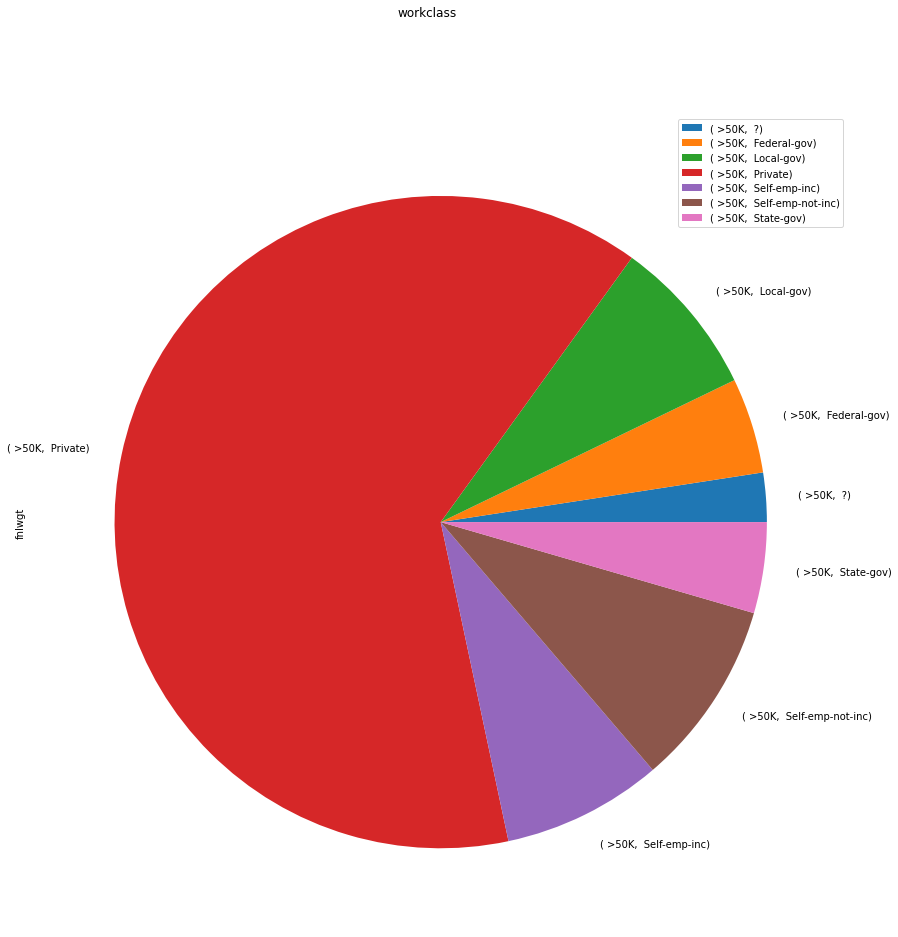

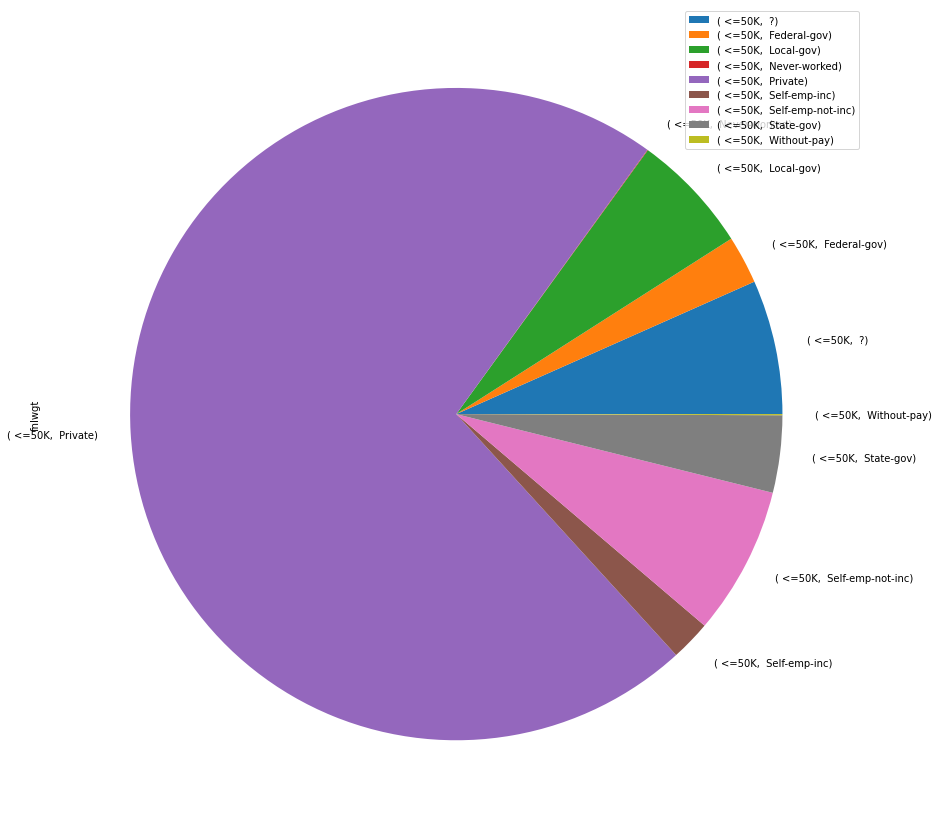

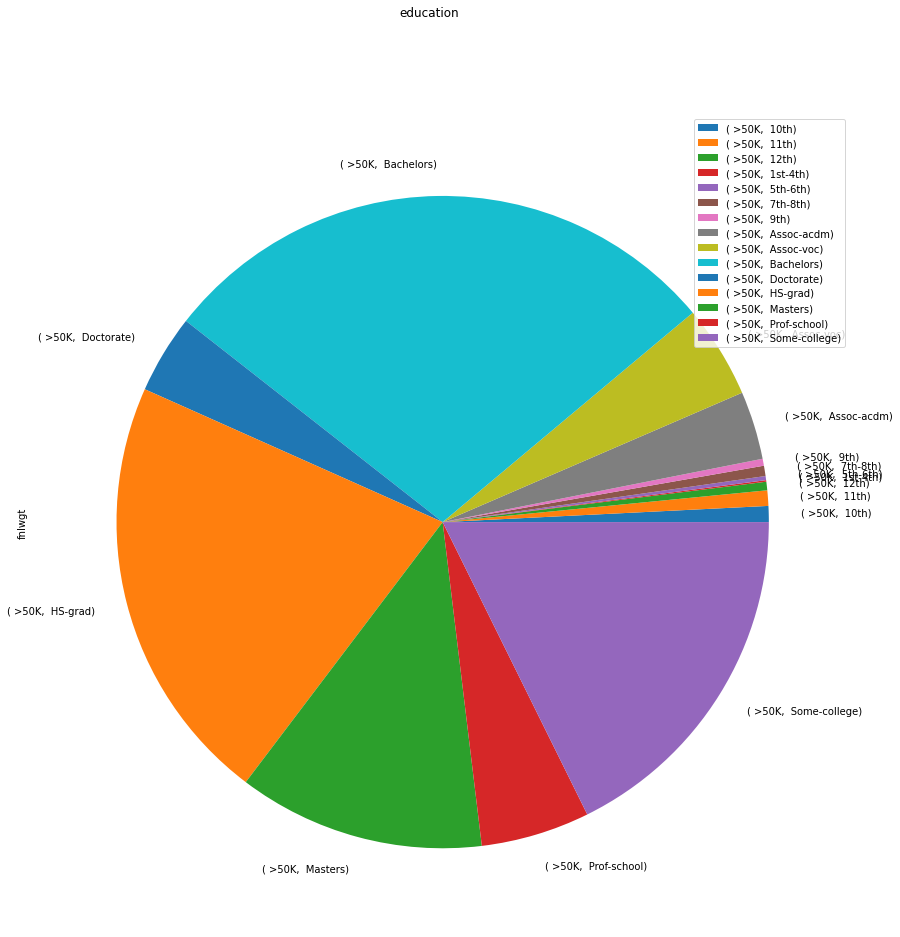

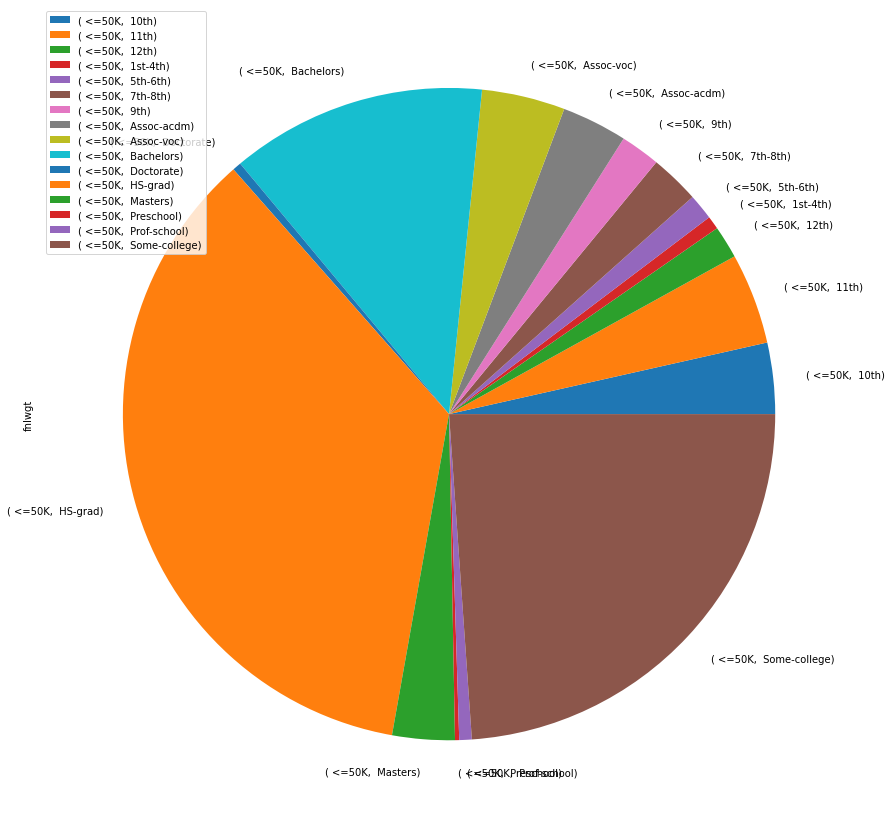

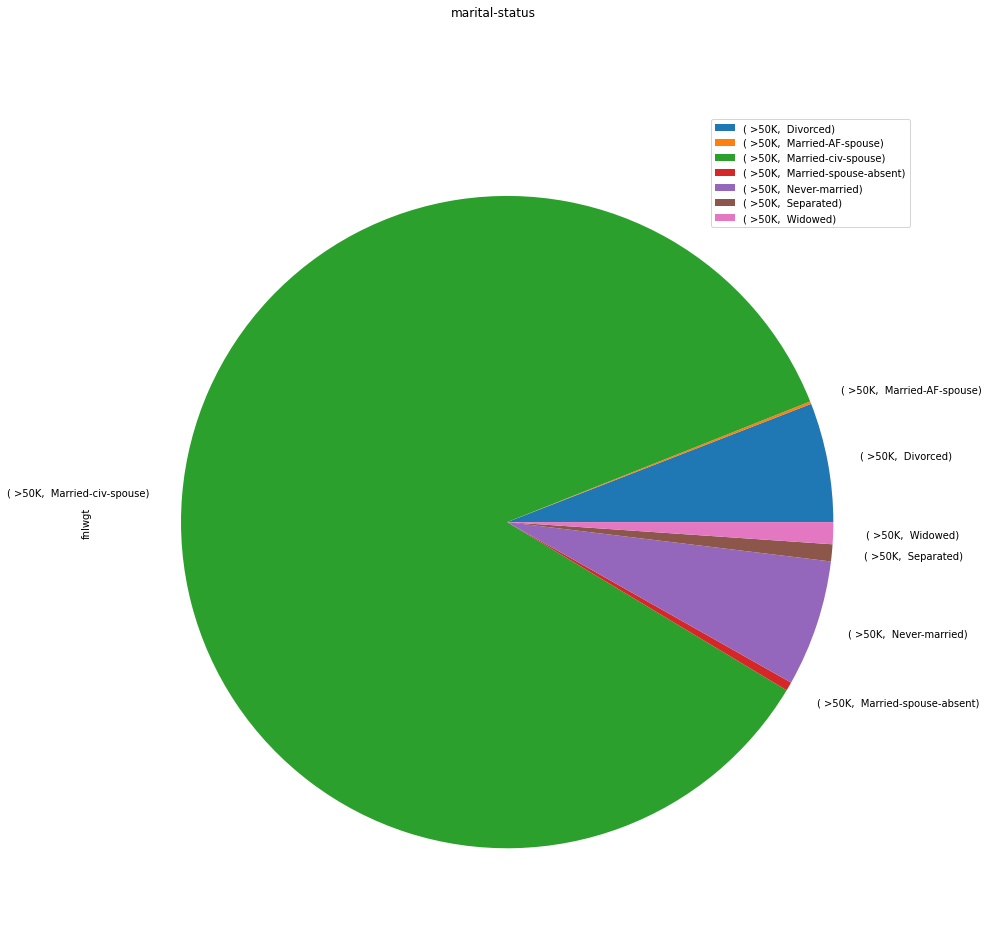

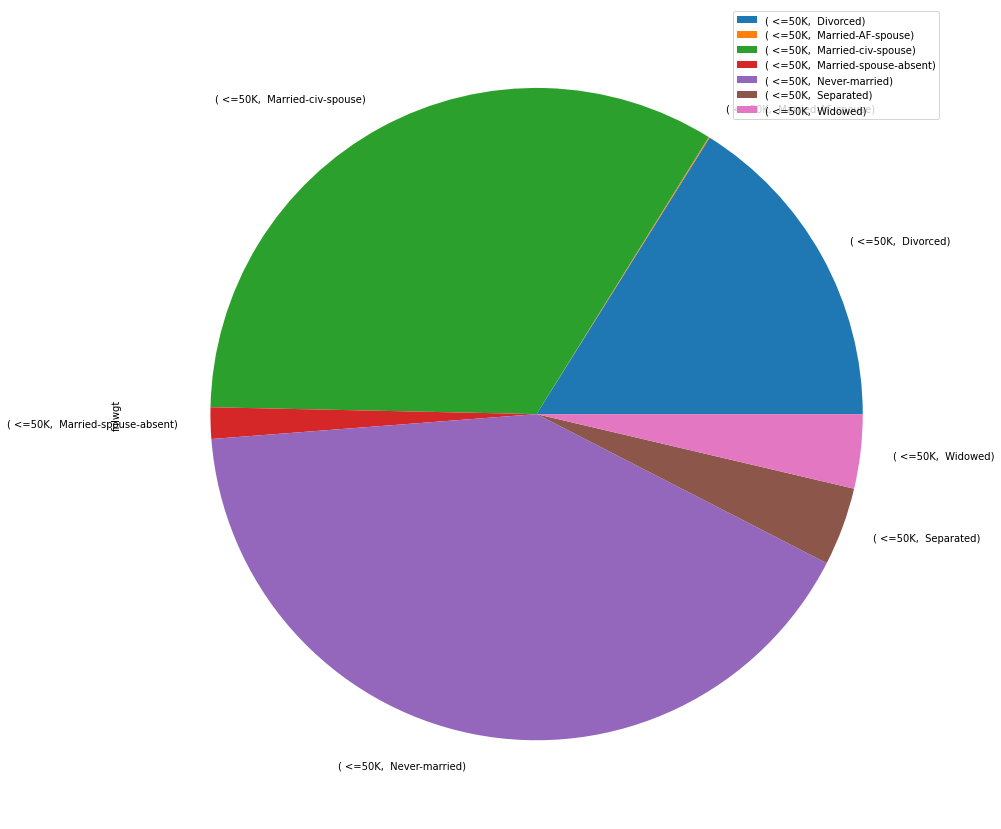

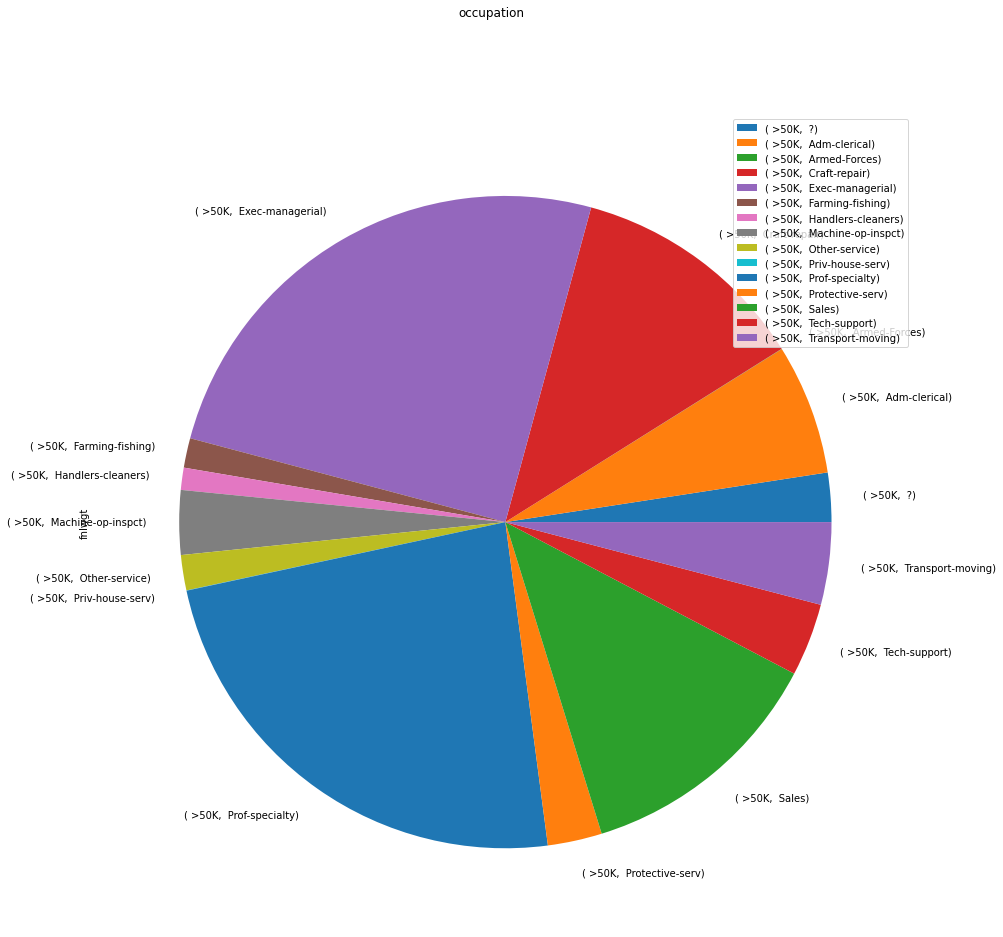

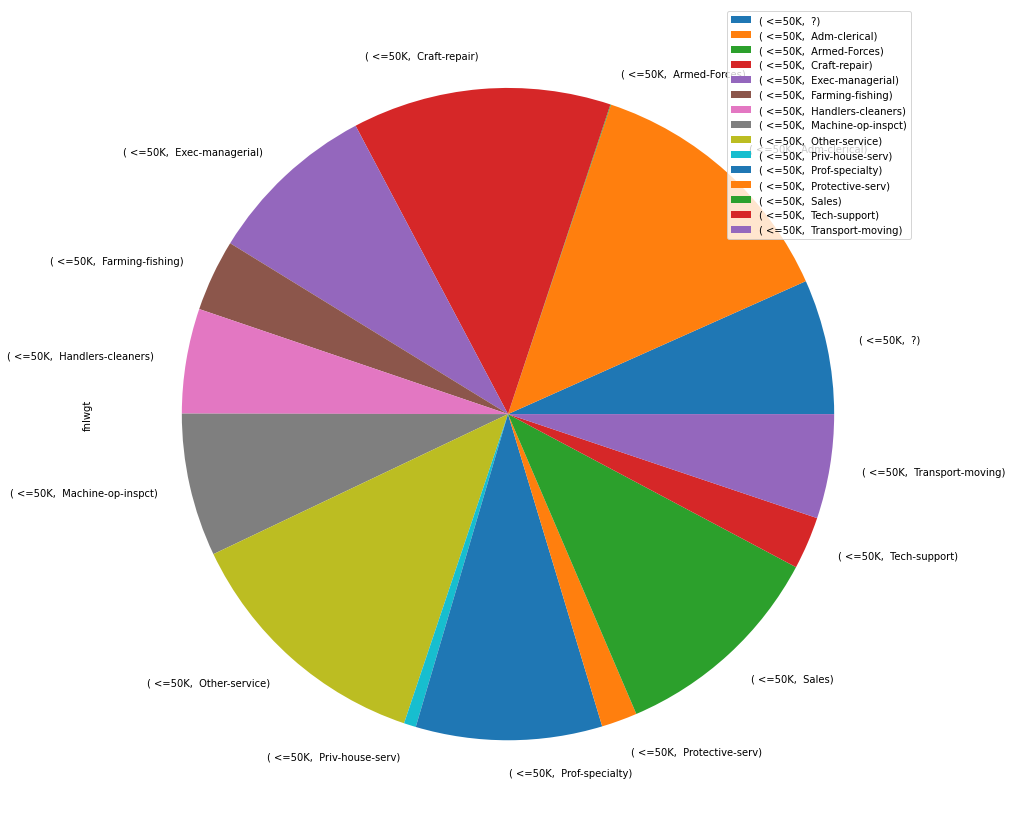

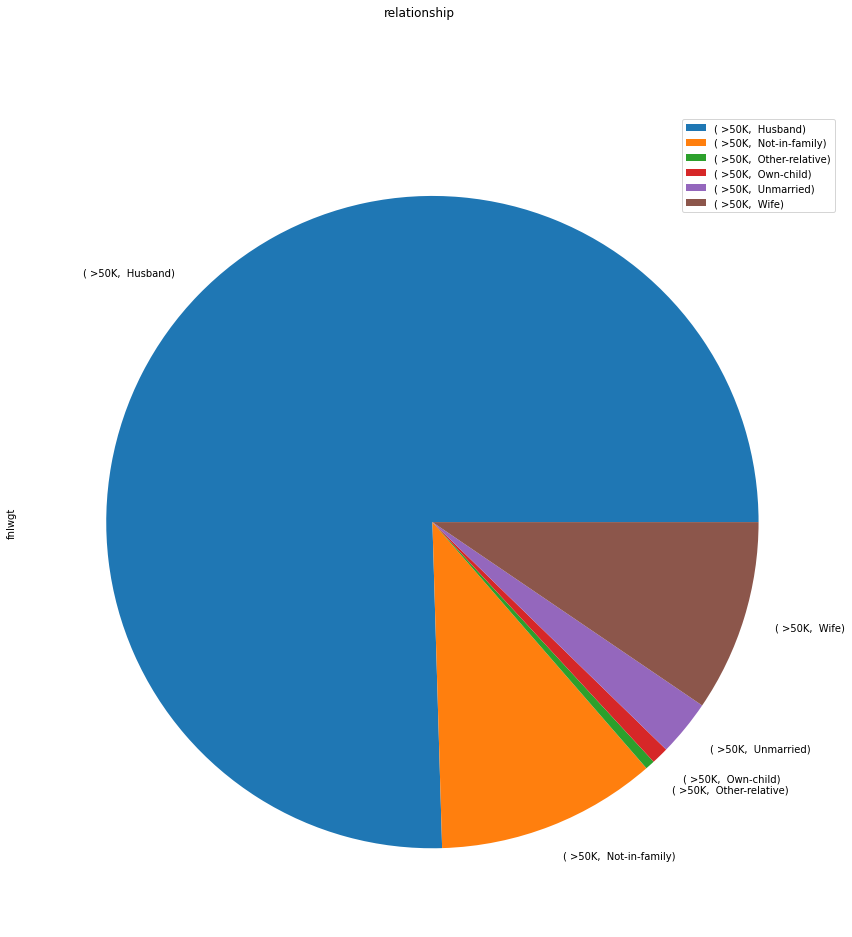

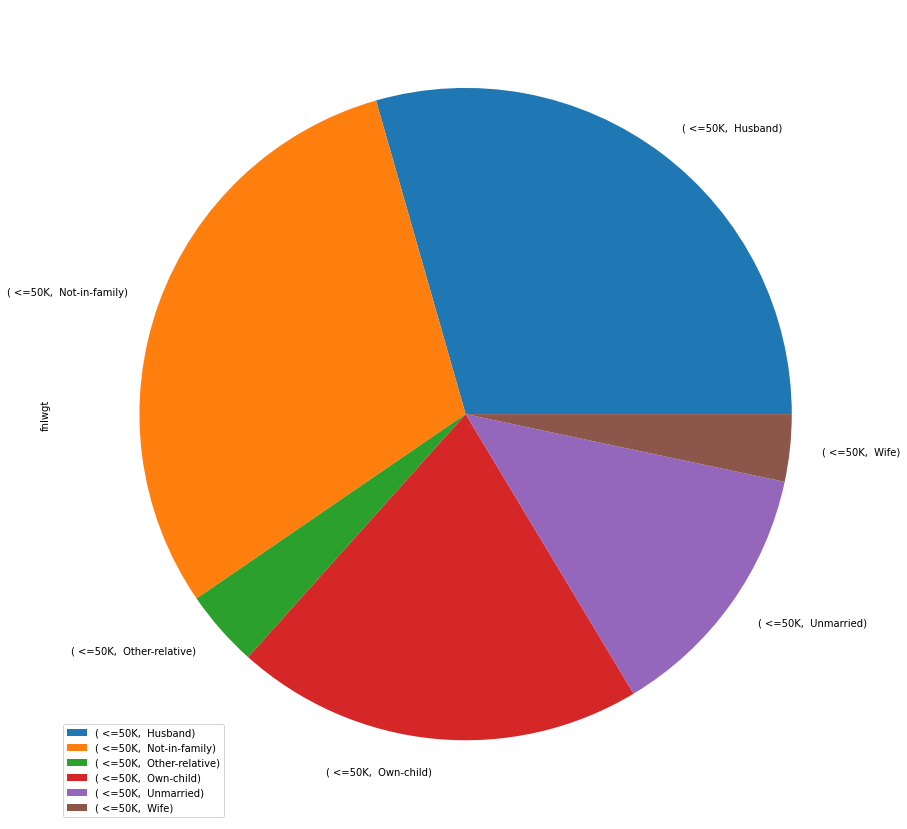

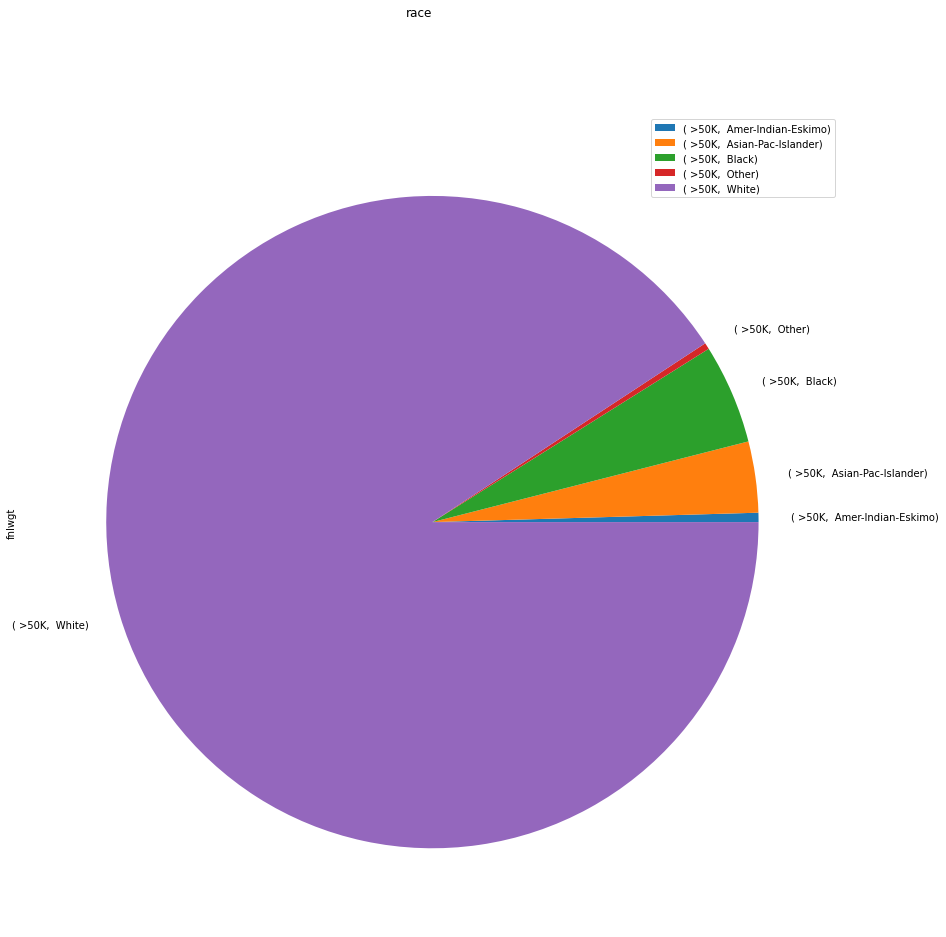

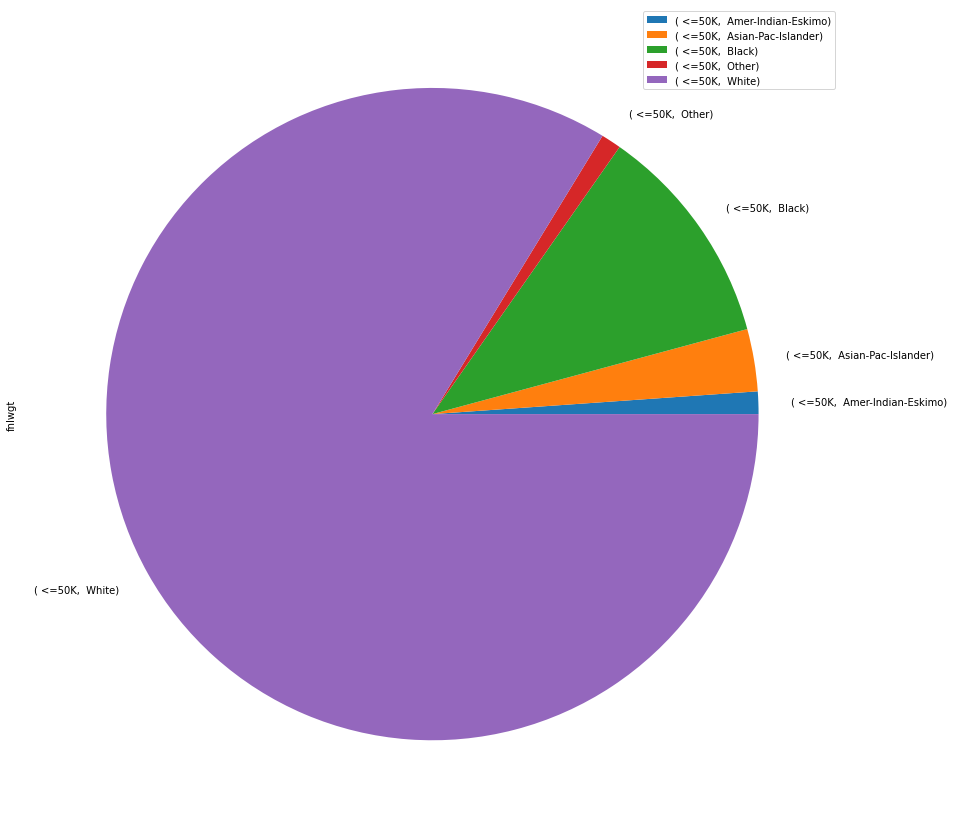

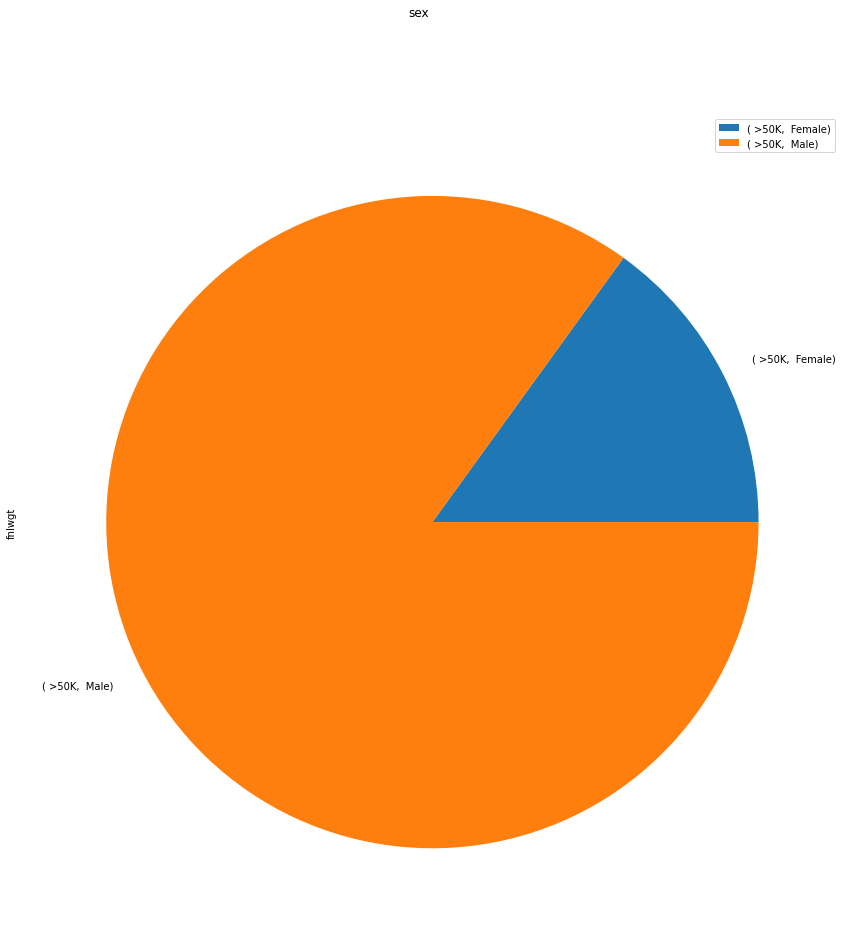

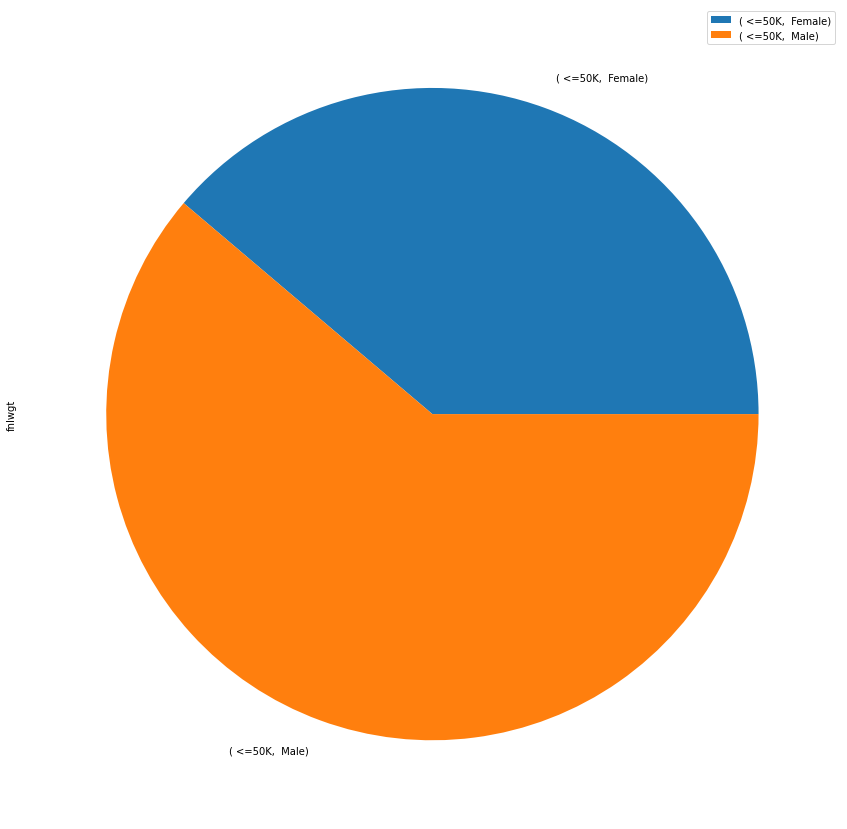

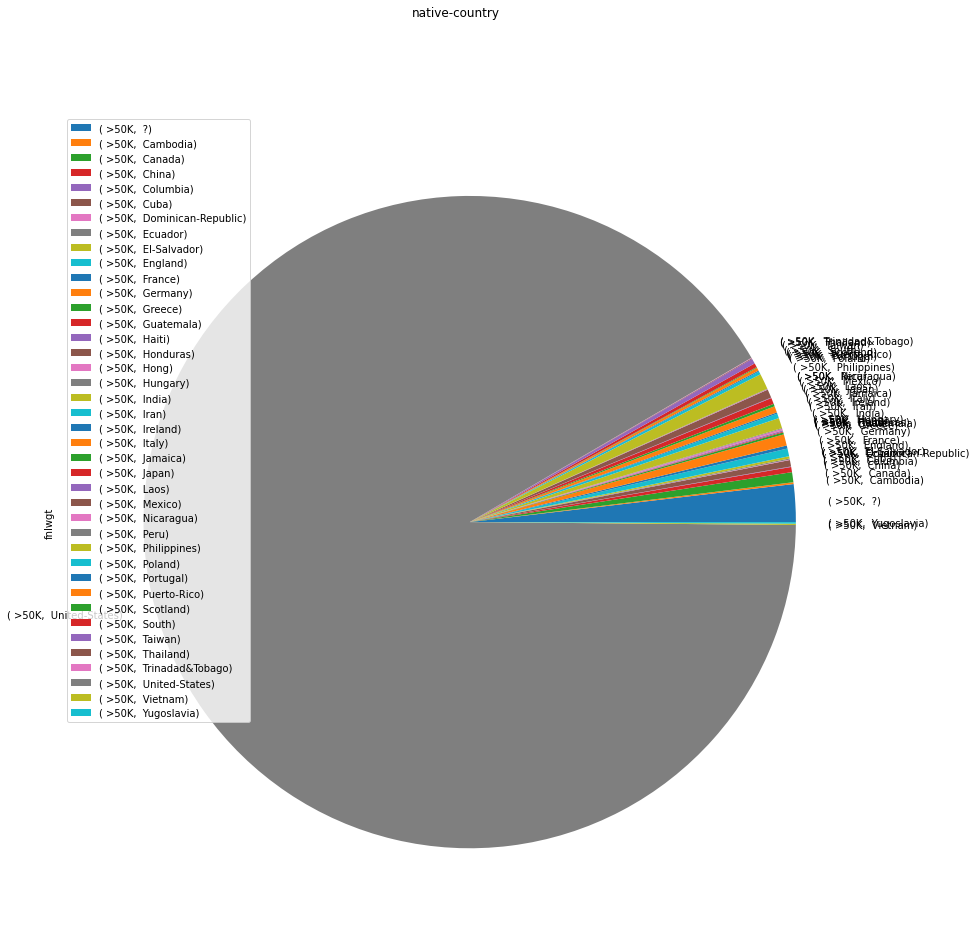

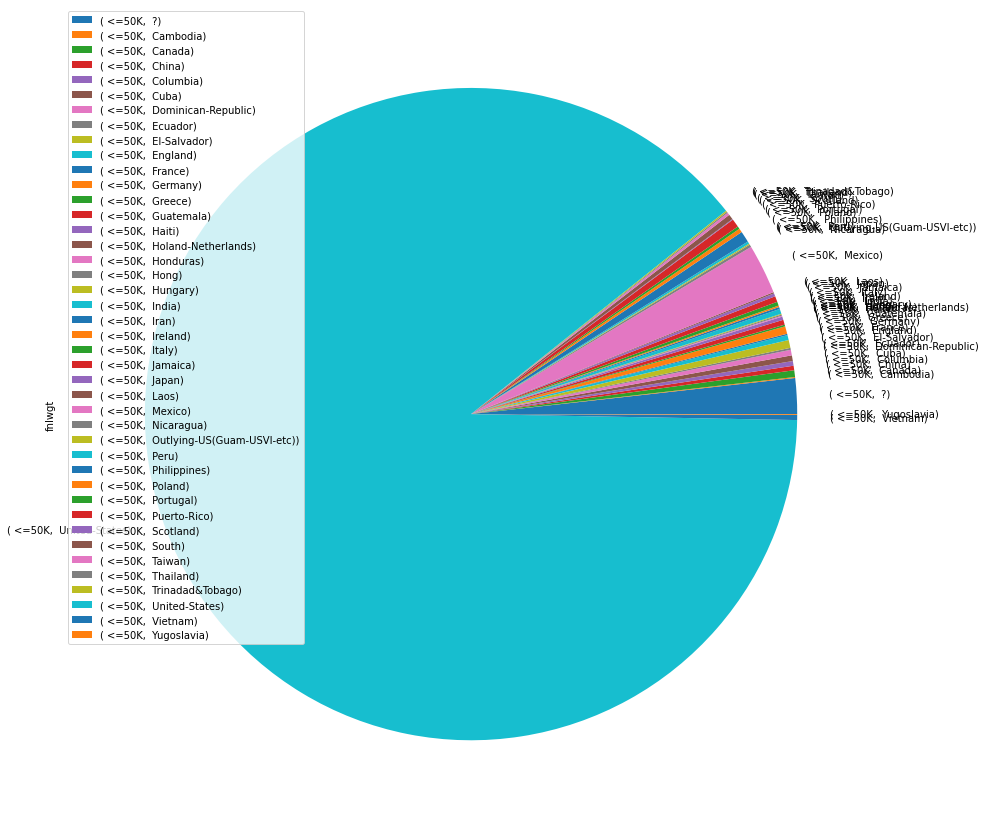

In [10]:
for c in list(ds.dtypes[ds.dtypes=='object'].index)[:-1]:
    try:
        gr_col(c)
    except:
        print(c,'Error')

In [11]:
ds.groupby('inc_class').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
inc_class,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


## Scatter

In [12]:
ds2=ds.copy()

In [13]:
from sklearn import preprocessing

for c in tqdm_notebook(list(ds.dtypes[ds.dtypes=='object'].index)):
    #le = preprocessing.LabelEncoder()
    #ds2[c]=le.fit_transform(ds2[c])
    dummies=pd.get_dummies(ds2[c])
    ds2.drop([c], axis=1, inplace=True)
    ds2=pd.concat([ds2,dummies])

<ipython-input-13-f9547992a8f5>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for c in tqdm_notebook(list(ds.dtypes[ds.dtypes=='object'].index)):


  0%|          | 0/9 [00:00<?, ?it/s]

In [14]:
ds2.shape

(16671232, 108)

In [15]:
ds2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,?,Federal-gov,Local-gov,Never-worked,...,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,<=50K,>50K
0,39.0,77516.0,13.0,2174.0,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,83311.0,13.0,0.0,0.0,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.0,215646.0,9.0,0.0,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53.0,234721.0,7.0,0.0,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.0,338409.0,13.0,0.0,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


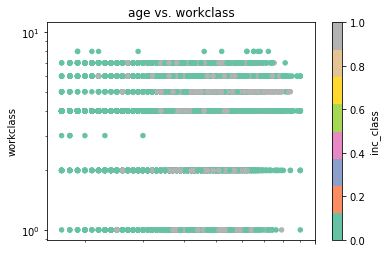

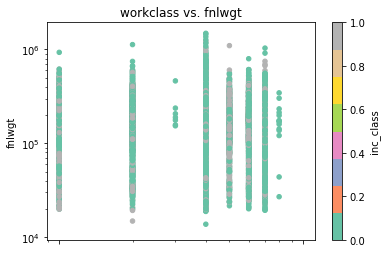

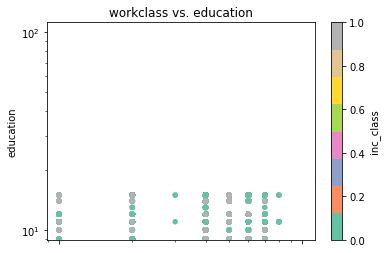

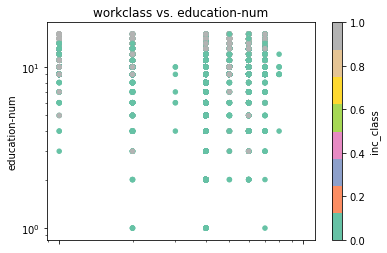

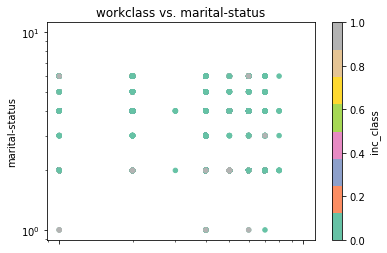

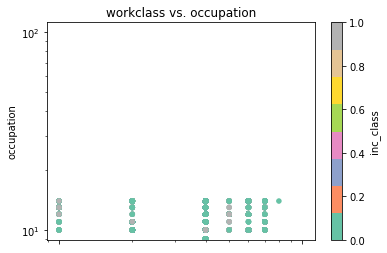

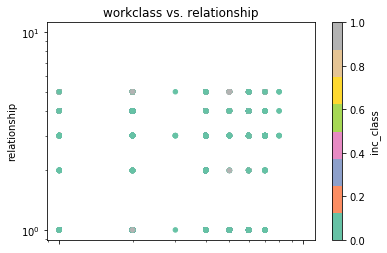

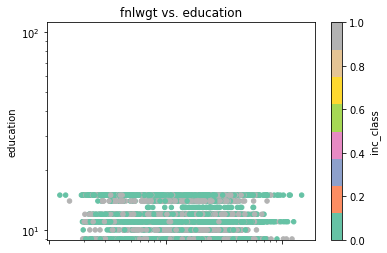

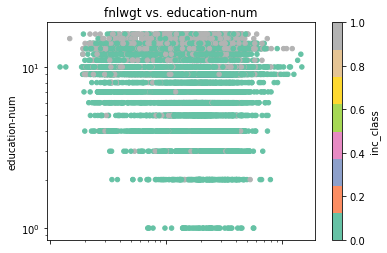

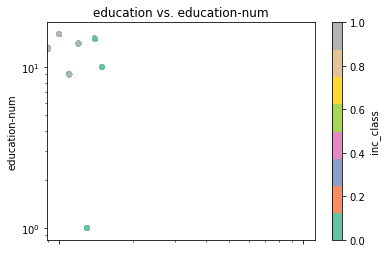

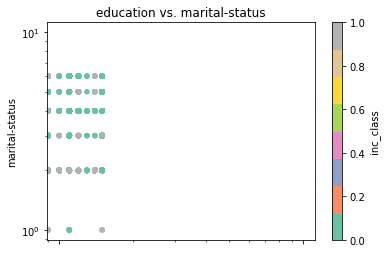

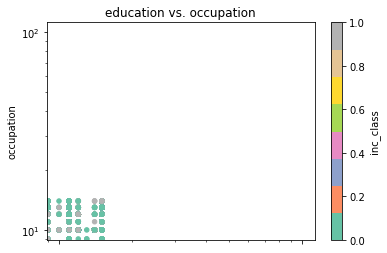

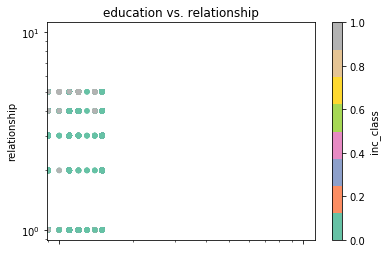

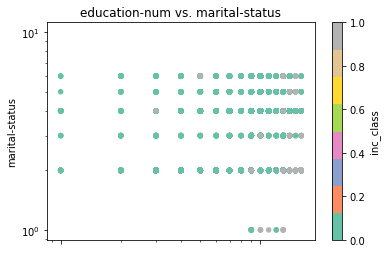

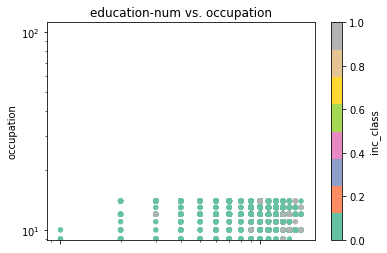

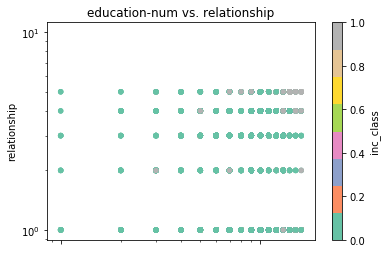

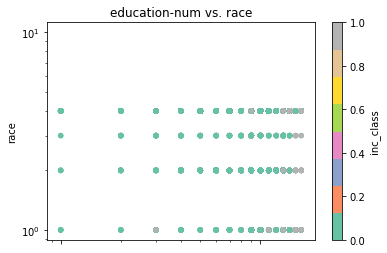

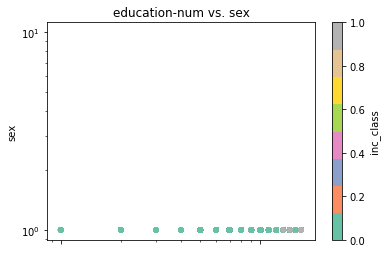

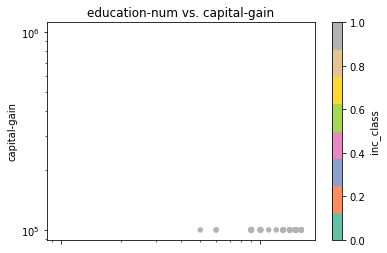

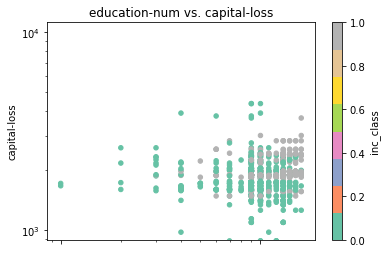

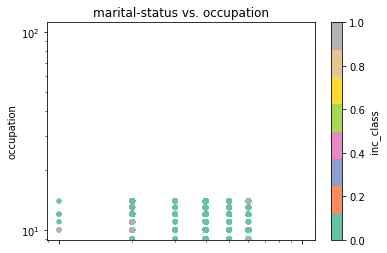

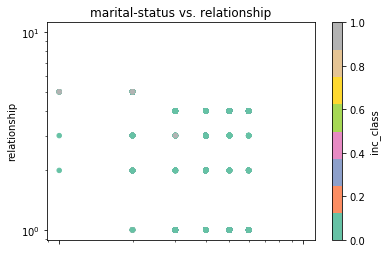

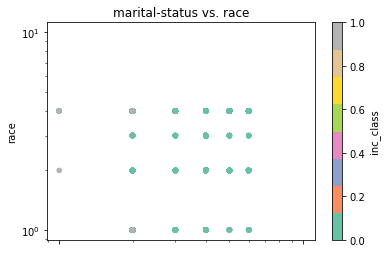

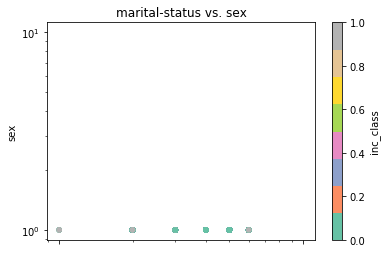

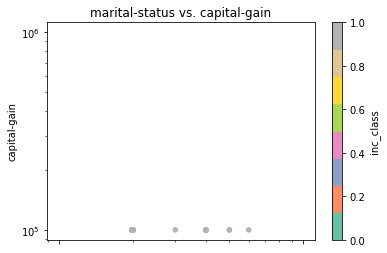

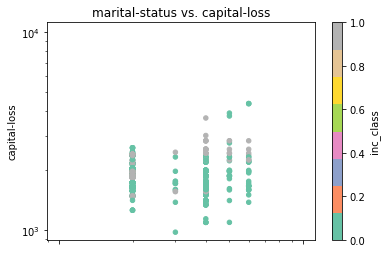

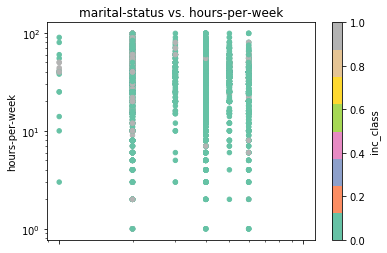

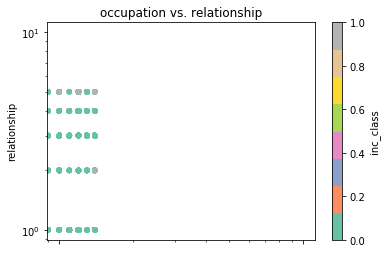

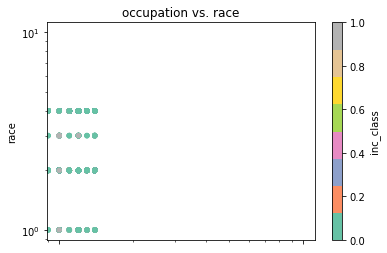

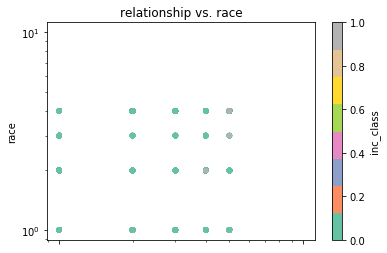

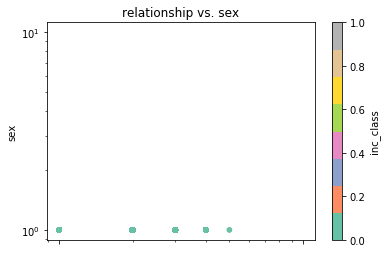

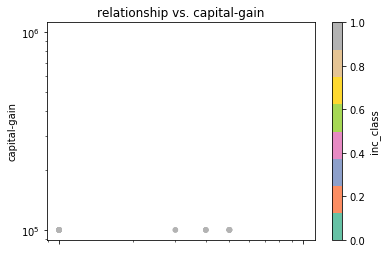

In [97]:
for i in range(len(ds2.columns[i])-1):
    for j in range(i+1,len(ds2.columns[i])-1):
        #print(i,j)
        ds2.plot(kind='scatter', x=ds2.columns[i], y=ds2.columns[j], colormap='Set2', c='inc_class', title=ds2.columns[i]+' vs. '+ds2.columns[j], loglog=True)

## Pairplot

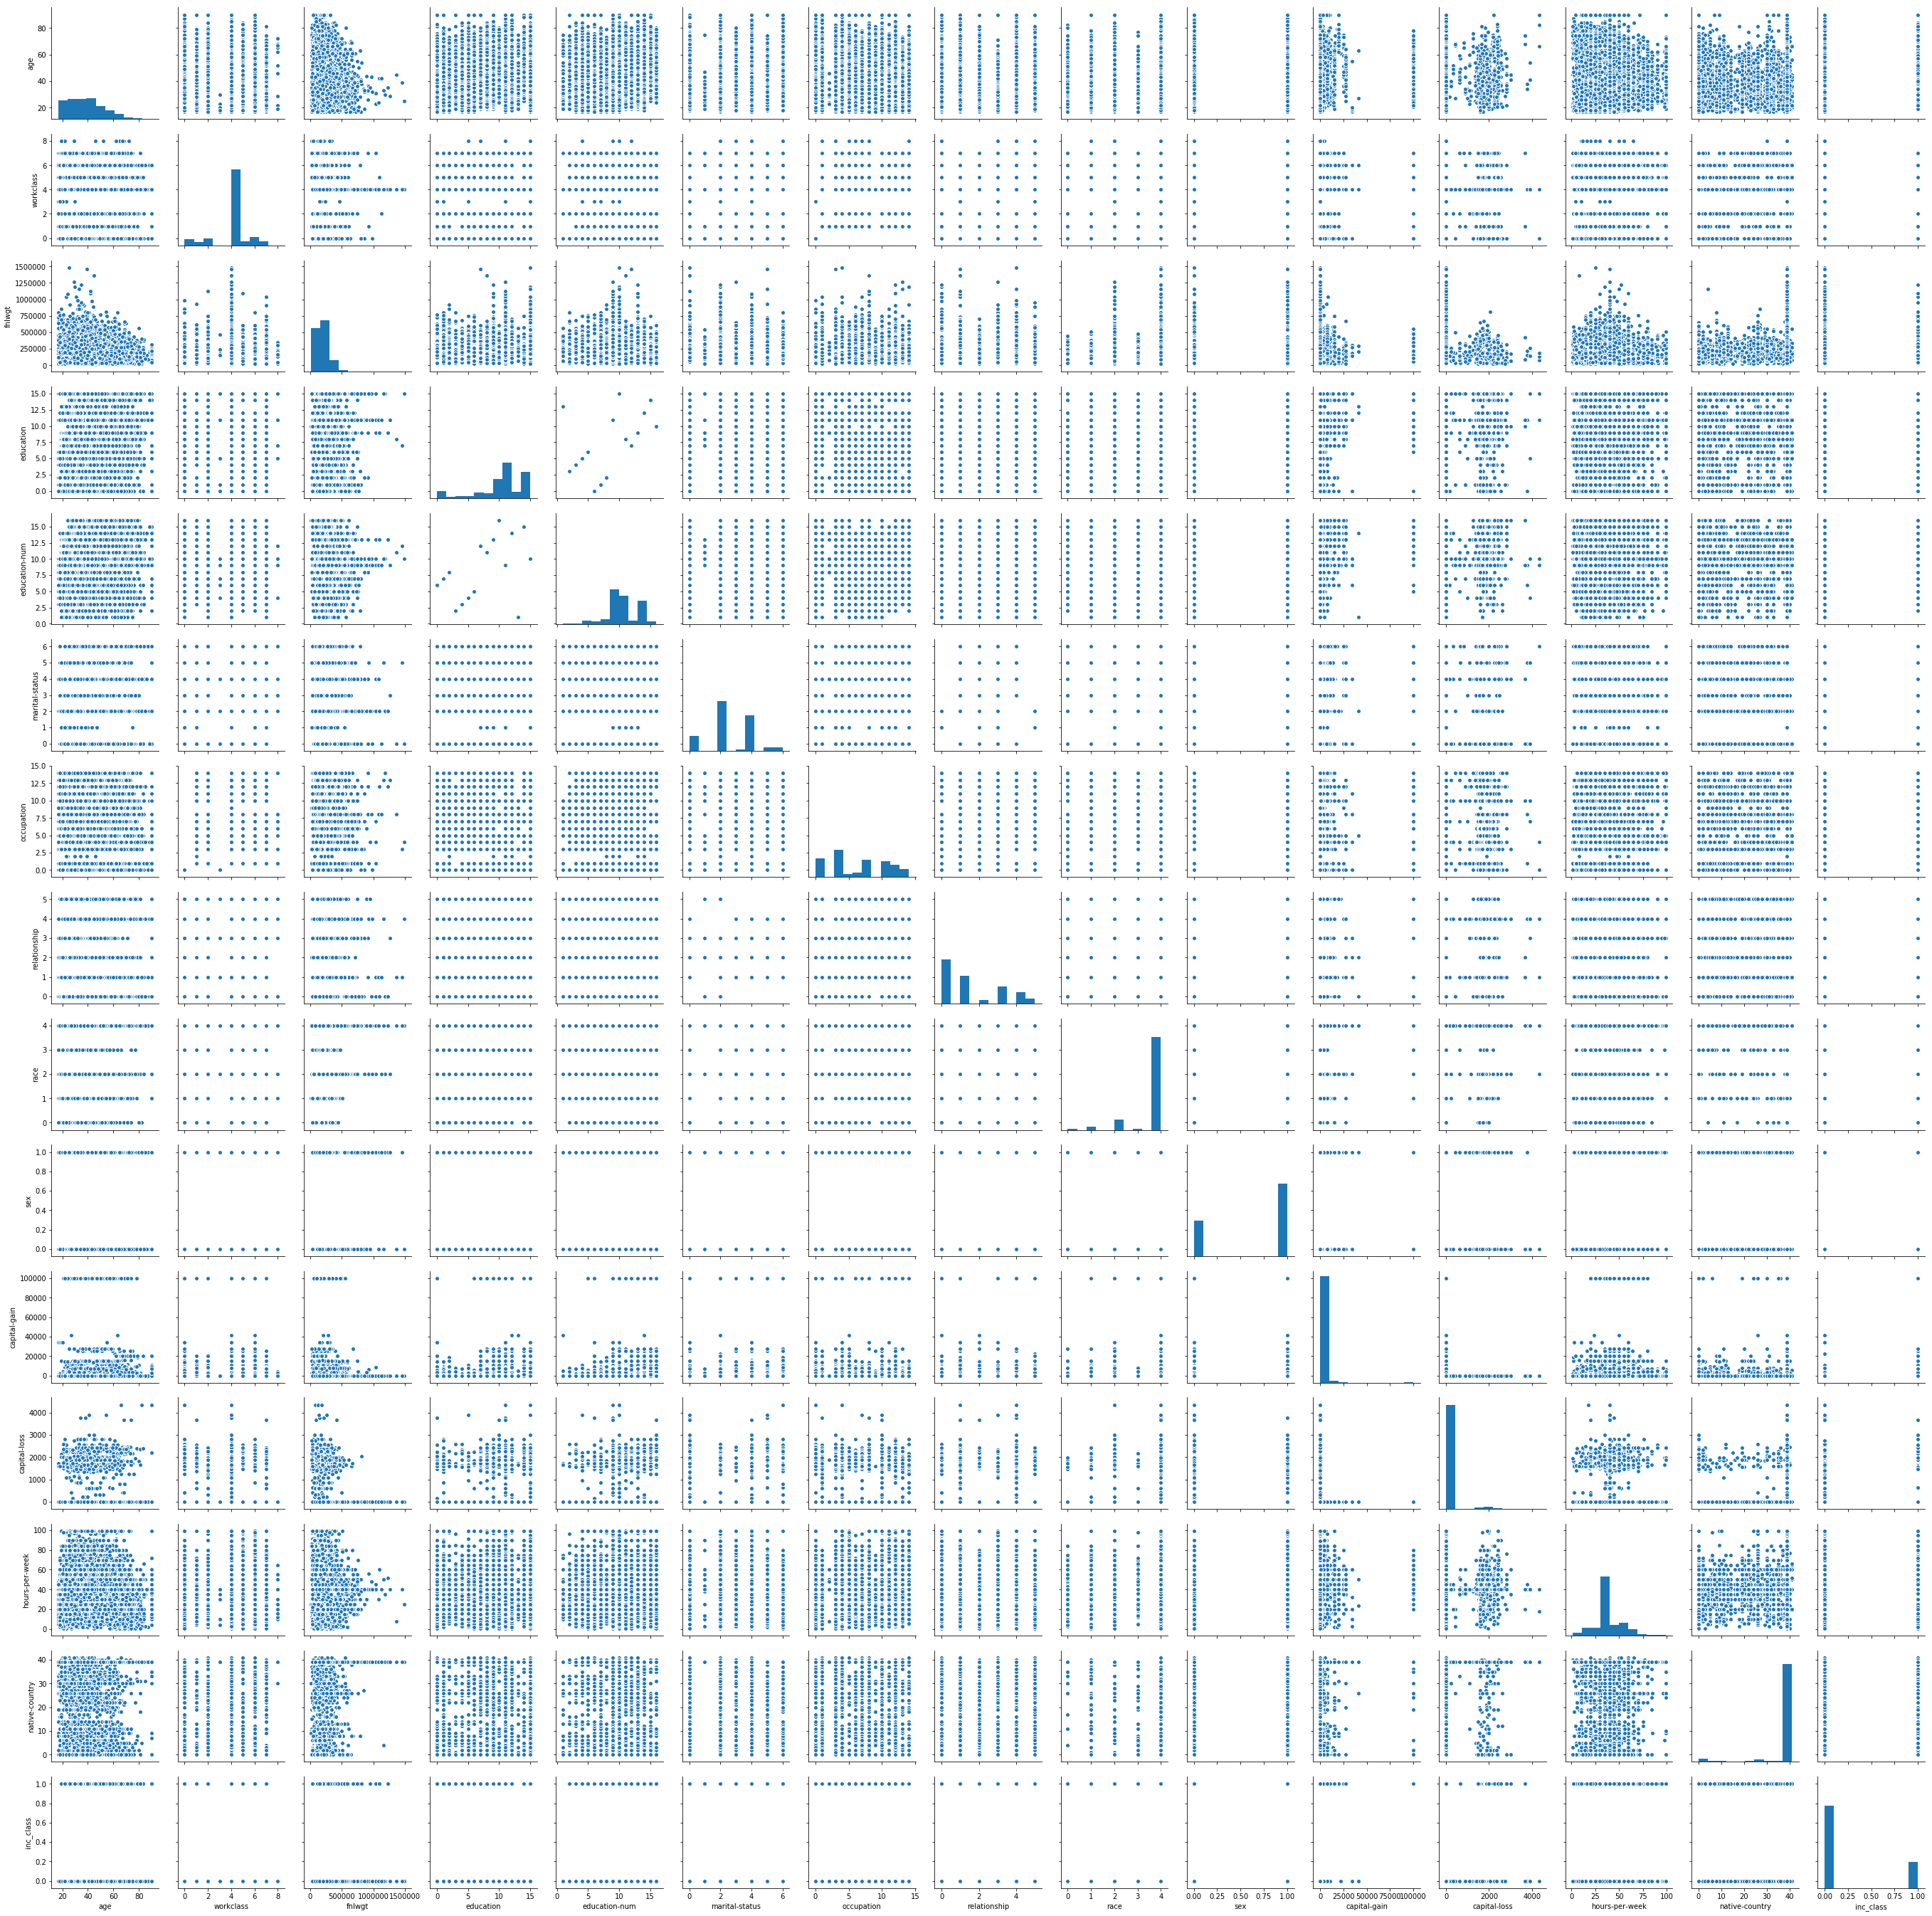

In [74]:
import seaborn as sns
sns.pairplot(ds2)

## Heatmap

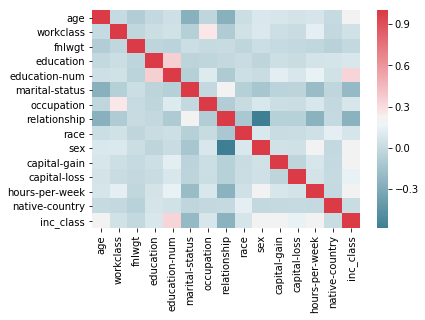

In [75]:
corr = ds2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Important features

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
ds.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'inc_class'],
      dtype='object')

In [37]:
x=ds2.iloc[:,:-1]
y=ds.inc_class

MemoryError: Unable to allocate 13.2 GiB for an array with shape (106, 16671232) and data type float64

In [38]:
clf = DecisionTreeClassifier()
clf.fit(x, y)

MemoryError: Unable to allocate 13.3 GiB for an array with shape (107, 16671232) and data type float64

In [85]:
clf.score(x,y)

0.8682165781149228

In [86]:
clf.feature_importances_

array([6.22770423e-02, 4.23691638e-03, 2.93030448e-03, 1.77262753e-04,
       2.04569399e-01, 2.39566930e-02, 2.23045797e-02, 3.50066336e-01,
       6.22280133e-04, 5.62738040e-03, 2.22293382e-01, 6.15633049e-02,
       3.82960168e-02, 1.07910254e-03])

In [91]:
feat_ds=pd.DataFrame()
feat_ds['feat_name']=x.columns
feat_ds['importance']=clf.feature_importances_
feat_ds.sort_values(by='importance', ascending=False)

,feat_name,importance
7,relationship,0.350066
10,capital-gain,0.222293
4,education-num,0.204569
0,age,0.062277
11,capital-loss,0.061563
12,hours-per-week,0.038296
5,marital-status,0.023957
6,occupation,0.022305
9,sex,0.005627
1,workclass,0.004237


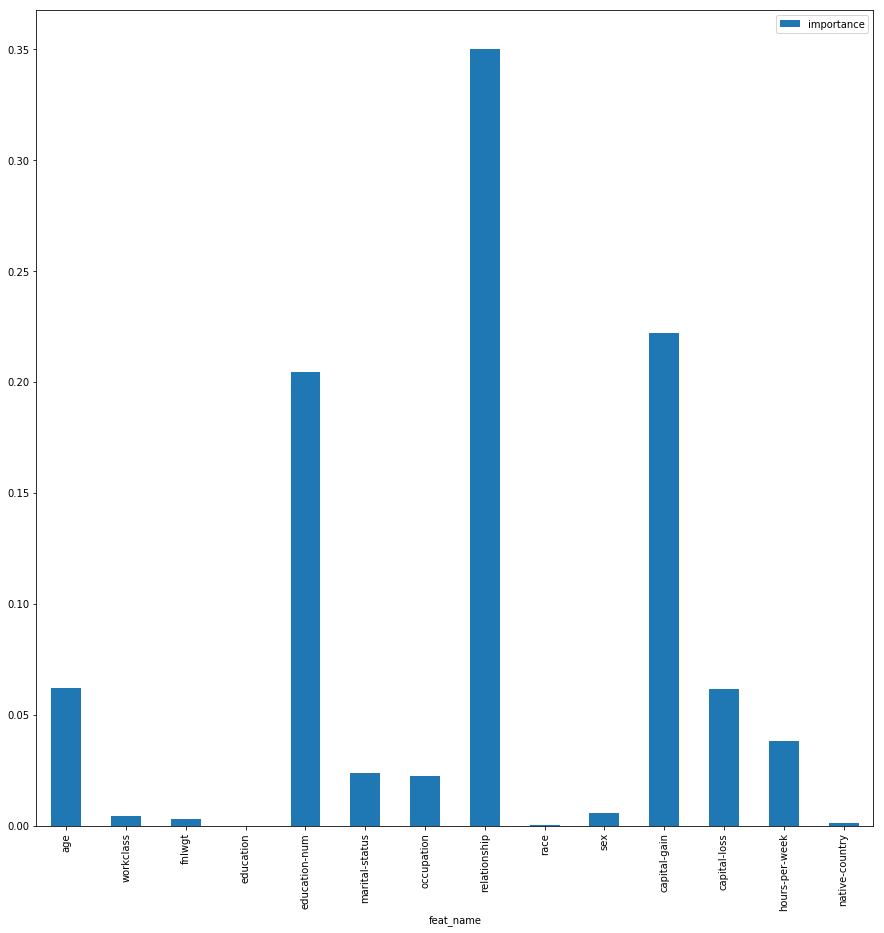

In [96]:
feat_ds.plot(kind='bar', x='feat_name', figsize=(15,15))

# Data preprocessing

In [8]:
ds.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
inc_class         0
dtype: int64

In [ ]:
Basic steps:
    -NANs
    -Cat feat enc
    -balancing dataset